In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Load csv
csv_file_path = 'results_pop_500.csv'
df = pd.read_csv(csv_file_path)

# Check dataframe
print(df.head(1))

   Iteration  Best Fitness  Elitism Rate  Mutation Rate  Population Size  \
0        150       12330.0          0.05            0.2              500   

       Crossover Type  Mutation Type  Duration (ms)  
0   twoPointCrossover   swapMutation           9118  


In [95]:
# Set style
sns.set(style="whitegrid")

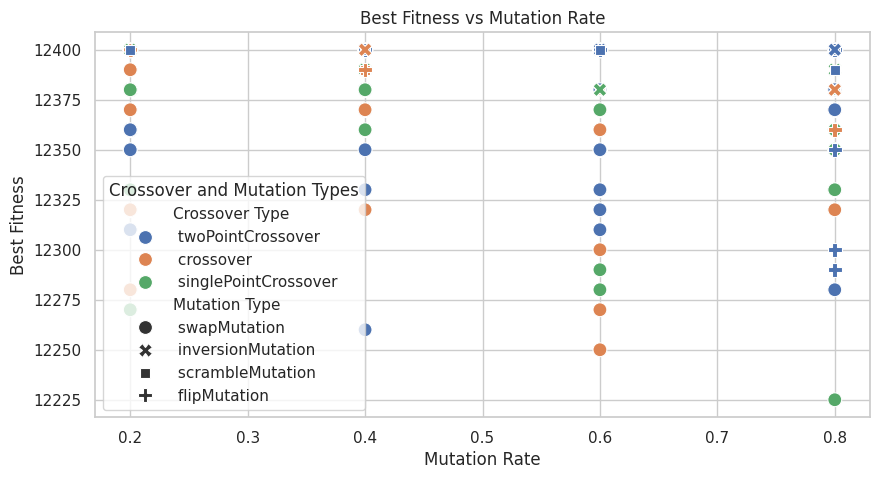

In [96]:
# Plot Best Fitness over different Mutation Rates
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Mutation Rate", y="Best Fitness", hue="Crossover Type", style="Mutation Type", s=100)
plt.title('Best Fitness vs Mutation Rate')
plt.xlabel('Mutation Rate')
plt.ylabel('Best Fitness')
plt.legend(title='Crossover and Mutation Types')
plt.show()

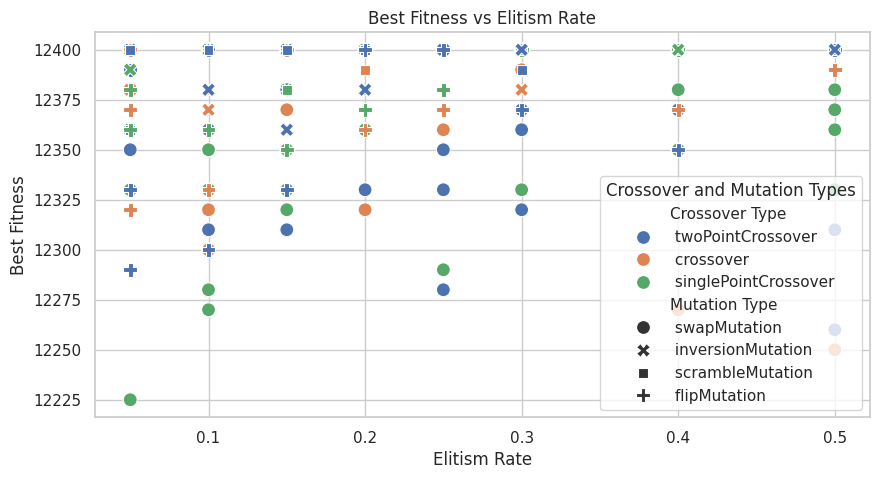

In [97]:
# Plot Best Fitness over different Elitism Rates
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Elitism Rate", y="Best Fitness", hue="Crossover Type", style="Mutation Type", s=100)
plt.title('Best Fitness vs Elitism Rate')
plt.xlabel('Elitism Rate')
plt.ylabel('Best Fitness')
plt.legend(title='Crossover and Mutation Types')
plt.show()

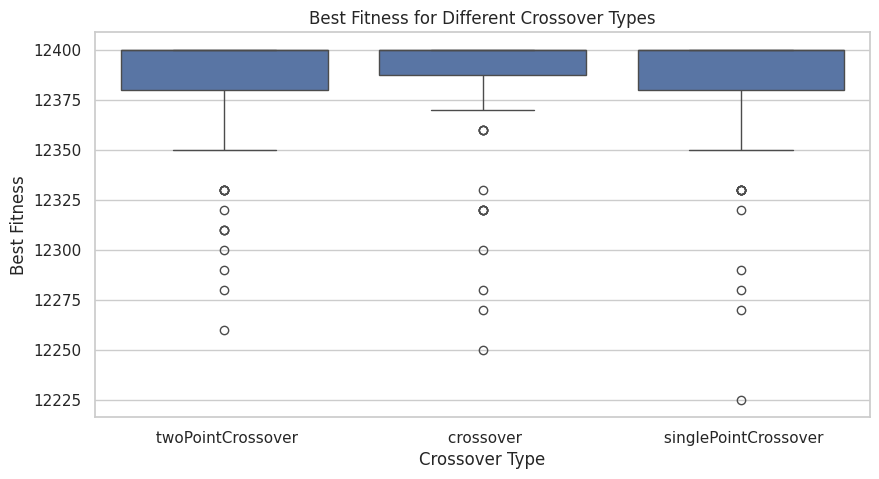

In [98]:
# Plot Best Fitness for different Crossover Types
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Crossover Type", y="Best Fitness")
plt.title('Best Fitness for Different Crossover Types')
plt.xlabel('Crossover Type')
plt.ylabel('Best Fitness')
plt.show()

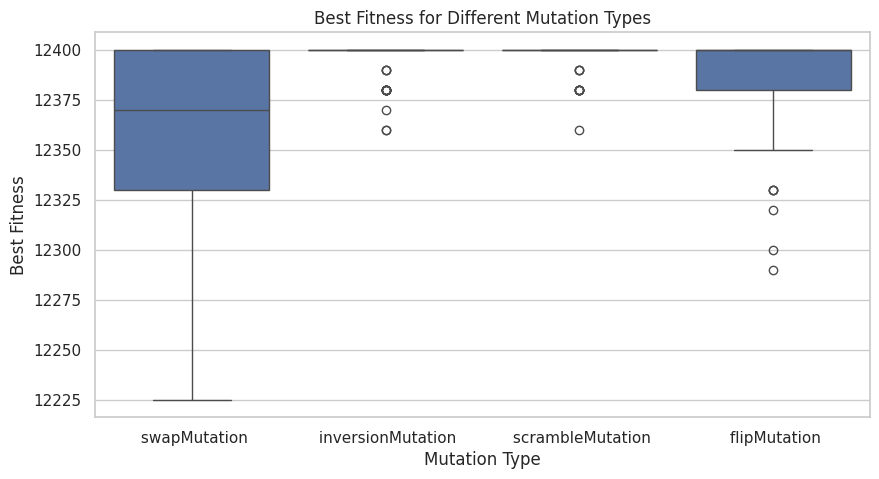

In [99]:
# Plot Best Fitness for different Mutation Types
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Mutation Type", y="Best Fitness")
plt.title('Best Fitness for Different Mutation Types')
plt.xlabel('Mutation Type')
plt.ylabel('Best Fitness')
plt.show()

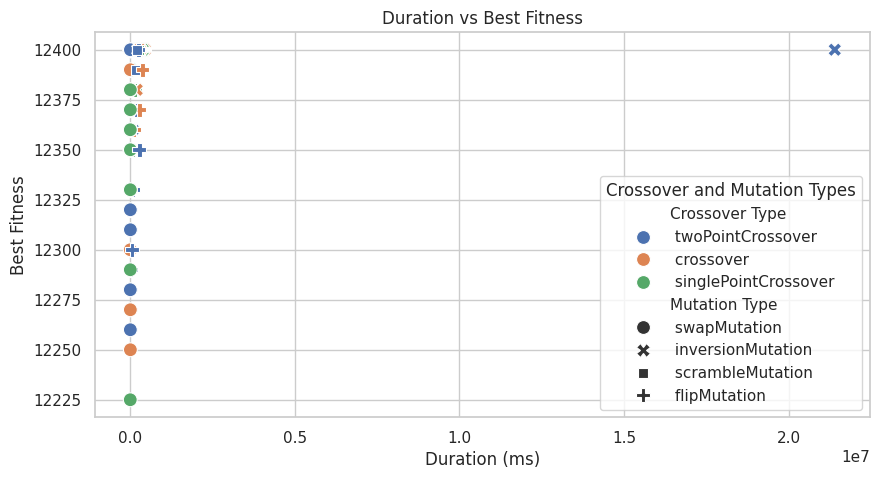

In [100]:
# Plot Duration vs Best Fitness
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x="Duration (ms)", y="Best Fitness", hue="Crossover Type", style="Mutation Type", s=100)
plt.title('Duration vs Best Fitness')
plt.xlabel('Duration (ms)')
plt.ylabel('Best Fitness')
plt.legend(title='Crossover and Mutation Types')
plt.show()

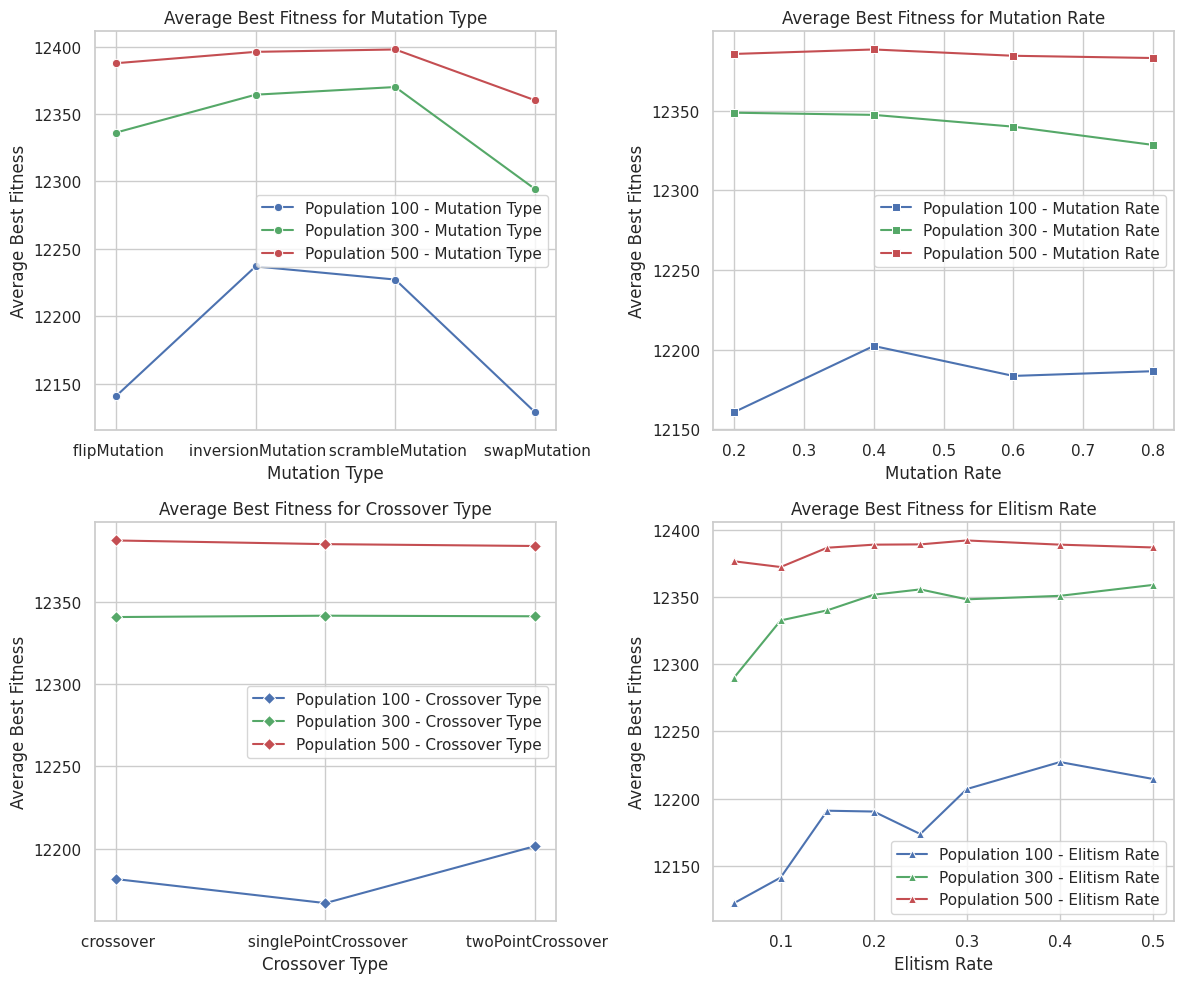

In [116]:

def plot_trends(df_list, labels):
    # Initialize subplots
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))
    
    # Colors for each dataframe
    colors = ['b', 'g', 'r']
    
    # Iterate through each dataframe and plot
    for i, df in enumerate(df_list):
        label = labels[i]
        
        # Calculate the averages
        mutation_type_avg = df.groupby("Mutation Type")["Best Fitness"].mean().reset_index()
        mutation_rate_avg = df.groupby("Mutation Rate")["Best Fitness"].mean().reset_index()
        crossover_type_avg = df.groupby("Crossover Type")["Best Fitness"].mean().reset_index()
        elitism_rate_avg = df.groupby("Elitism Rate")["Best Fitness"].mean().reset_index()
        
        # Plot average best fitness for each category
        sns.lineplot(data=mutation_type_avg, x="Mutation Type", y="Best Fitness", marker='o', label=f'{label} - Mutation Type', ax=ax[0][0], color=colors[i])
        sns.lineplot(data=mutation_rate_avg, x="Mutation Rate", y="Best Fitness", marker='s', label=f'{label} - Mutation Rate', ax=ax[0][1], color=colors[i])
        sns.lineplot(data=crossover_type_avg, x="Crossover Type", y="Best Fitness", marker='D', label=f'{label} - Crossover Type', ax=ax[1][0], color=colors[i])
        sns.lineplot(data=elitism_rate_avg, x="Elitism Rate", y="Best Fitness", marker='^', label=f'{label} - Elitism Rate', ax=ax[1][1], color=colors[i])
    
    # Customize the plots
    ax[0][0].set_title('Average Best Fitness for Mutation Type')
    ax[0][0].set_xlabel('Mutation Type')
    ax[0][0].set_ylabel('Average Best Fitness')

    ax[0][1].set_title('Average Best Fitness for Mutation Rate')
    ax[0][1].set_xlabel('Mutation Rate')
    ax[0][1].set_ylabel('Average Best Fitness')

    ax[1][0].set_title('Average Best Fitness for Crossover Type')
    ax[1][0].set_xlabel('Crossover Type')
    ax[1][0].set_ylabel('Average Best Fitness')

    ax[1][1].set_title('Average Best Fitness for Elitism Rate')
    ax[1][1].set_xlabel('Elitism Rate')
    ax[1][1].set_ylabel('Average Best Fitness')
    
    # Adjust layout to make it cleaner
    plt.tight_layout()
    plt.legend()
    plt.show()

# Load the CSV files into DataFrames
csv_file_path_100 = 'results_pop_100.csv'
df100 = pd.read_csv(csv_file_path_100)
csv_file_path_300 = 'results_pop_300.csv'
df300 = pd.read_csv(csv_file_path_300)
csv_file_path_500 = 'results_pop_500.csv'
df500 = pd.read_csv(csv_file_path_500)

# Call the function with the dataframes and their labels
plot_trends([df100, df300, df500], ['Population 100', 'Population 300', 'Population 500'])


On peut voir que 
- swap mutation la moins bonne
- mutation rate a perf fixe, mais il faudrait essayer avec des bien plus basses
- cross over aucune incidence
- meilleure performance avec elitisme plus elevé, entre 0.2 et 0.5 est idéal